In [18]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier

In [88]:
df=pd.read_csv("Titanic.csv")

In [6]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
304,305,0,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9000,NaN,S
467,468,0,1,"Smart, Mr. John Montgomery",male,56.0,0,0,113792,26.5500,NaN,S
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
226,227,1,2,"Mellors, Mr. William John",male,19.0,0,0,SW/PP 751,10.5000,NaN,S
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,NaN,S
103,104,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
427,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [89]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [90]:
#Step1-Train/Test/split
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=['Survived']),
                                               df['Survived'],
                                              test_size=0.2,
                                              random_state=42)

In [79]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [91]:
#Applying Imputation inorder to fill null values in age and Embarked column

si_age=SimpleImputer()
si_embark=SimpleImputer(strategy='most_frequent')

X_train_age=si_age.fit_transform(X_train[['Age']])
X_train_embark=si_embark.fit_transform(X_train[['Embarked']])

X_test_age=si_age.transform(X_test[['Age']])
X_test_embark=si_embark.transform(X_test[['Embarked']])

In [67]:
X_train_age

array([[45.5       ],
       [23.        ],
       [32.        ],
       [26.        ],
       [ 6.        ],
       [24.        ],
       [45.        ],
       [29.        ],
       [29.49884615],
       [29.49884615],
       [42.        ],
       [36.        ],
       [33.        ],
       [17.        ],
       [29.        ],
       [50.        ],
       [35.        ],
       [38.        ],
       [34.        ],
       [17.        ],
       [11.        ],
       [61.        ],
       [30.        ],
       [ 7.        ],
       [63.        ],
       [20.        ],
       [29.49884615],
       [29.        ],
       [36.        ],
       [29.49884615],
       [50.        ],
       [27.        ],
       [30.        ],
       [33.        ],
       [29.49884615],
       [29.49884615],
       [ 2.        ],
       [25.        ],
       [51.        ],
       [25.        ],
       [29.49884615],
       [29.49884615],
       [24.        ],
       [18.        ],
       [29.49884615],
       [25

In [92]:
#Apply OHE on sex, Embarked

ohe_sex=OneHotEncoder(sparse=False,handle_unknown='ignore')
ohe_embark=OneHotEncoder(sparse=False,handle_unknown='ignore')

X_train_sex=ohe_sex.fit_transform(X_train[['Sex']])
X_train_embark=ohe_embark.fit_transform(X_train[['Embarked']])

X_test_sex=ohe_sex.transform(X_test[['Sex']])
X_test_embark=ohe_embark.transform(X_test[['Embarked']])

/Users/priya/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/priya/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [93]:
X_test_age.shape

(179, 1)

In [94]:
#Remove columns from original df to append the newly transformed columns

X_train_rem=X_train.drop(columns=['Sex','Age','Embarked'])
X_test_rem=X_test.drop(columns=['Sex','Age','Embarked'])

In [84]:
X_test_rem.shape

(179, 4)

In [95]:
X_train_transformed = np.concatenate((X_train_rem,X_train_age,X_train_sex,X_train_embark),axis=1)
X_test_transformed = np.concatenate((X_test_rem,X_test_age,X_test_sex,X_test_embark),axis=1)

In [100]:
X_test_transformed.shape

(179, 11)

In [101]:
clf = DecisionTreeClassifier()
clf.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [102]:
y_pred = clf.predict(X_test_transformed)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1])

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7821229050279329

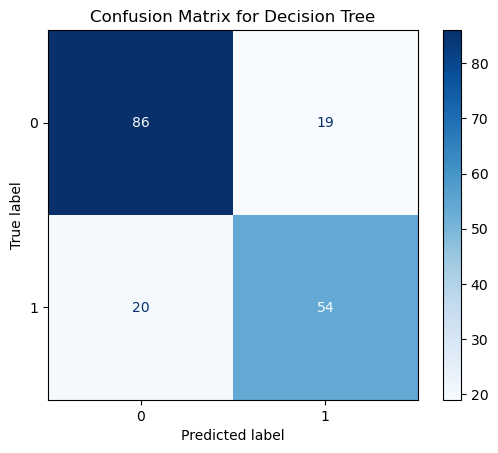

In [108]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Decision Tree")
plt.show()
